In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
# Importing the necessary libraries
import numpy as np
import visualize.plot_trajectories as pt
import visualize.generate_videos as gv

from figs import FiGS
from control.vehicle_rate_mpc import VehicleRateMPC

In [3]:
scene_name   = 'scene003'
rollout_type = 'baseline'
frame_name   = 'carl'
policy_name  = 'vrmpc_fr'
course_name  = 'cluttered001'

In [4]:
test = FiGS(scene_name, rollout_type, frame_name)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
/home/admin/StanfordMSL/SFTI-Program/nerf_data/outputs/backroom/splatfacto/2024-11-13_204632/nerfstudio_models/step-0000
29999.ckpt

In [5]:
# Load the policy
policy = VehicleRateMPC(policy_name,frame_name,course_name)

t0,tf,x0 = policy.tXUd[0,0],policy.tXUd[0,-1],policy.tXUd[1:11,0]
Tro,Xro,Uro,Imgs,Tsol,_ = test.simulate(policy,t0,tf,x0,cleanup=True)

policy.clear_generated_code()
del policy

/home/admin/anaconda3/envs/figs/lib/python3.10/site-packages/torch/_inductor/compile_fx.py:135: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (640, 360) to (640, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


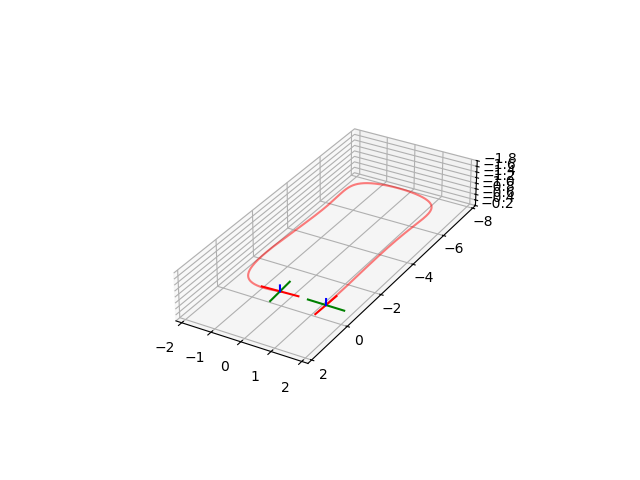

In [8]:
# Generate the video
gv.images_to_mp4(Imgs, 'output.mp4', 20)

# Plot the results
pt.plot_RO_spatial((Tro,Xro,Uro))